<a href="https://colab.research.google.com/github/bharatbajoria/Summer-Internship/blob/master/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF Reading

In [60]:
pip install pyPDF2

In [0]:
import PyPDF2

In [0]:
#Taking file input
#number of files
nf=2

file= open('Apr-18.PDF','rb')
file1= open('Apr-17.PDF','rb')
  

In [0]:
#A list of  input files
file_list=[file,file1]

In [0]:
# Reading number of pages
pages=[]

for i in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[i])
  n1=pdfReader.numPages
  pages.append(n1)

In [0]:
# A list containing all files, All_Docs[i] is i-th file 
# All_Docs[i][j] is j-th page of i-th file
All_Docs=[] 

for j in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[j])
  file_text=[] #takes string of page text
  for i in range(pages[j]):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    file_text.append(a)
  
  All_Docs.append(file_text)

# Finding Optimal number of Clusters

In [0]:
Dup_All_Docs=All_Docs[:]

In [0]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
en_stop.add('the')#The is not in stopwords

In [0]:
tokens=[]#a list of tokens for input files

for j in All_Docs:
  x=[]
  for i in j:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
  tokens.extend(x)

In [71]:
len(tokens),tokens[:10]

(7941,
 ['press',
  'release',
  'department',
  'communication',
  'central',
  'office',
  'marg',
  'mumbai',
  'phone',
  'fax'])

In [0]:
#2nd Method using Silhouette Score
n=0
ss=0
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(tokens)

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(Y)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y, label, metric='euclidean')  
    
    if sil_coeff>ss:
      ss=sil_coeff
      n=n_cluster

In [73]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


# LDA

In [0]:

import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel,LdaMulticore,CoherenceModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt

In [75]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:

dictionary=Dictionary([[i] for i in tokens])

In [77]:
print(dictionary)

Dictionary(2065 unique tokens: ['press', 'release', 'department', 'communication', 'central']...)


In [0]:
X=[dictionary.doc2bow([sents]) for sents in tokens]#getting bag of words.
tfidf=TfidfModel(X)
X=tfidf[X]

In [0]:


lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
lda1=LdaModel(X,num_topics=n,id2word=dictionary,update_every=5)

#lda.print_topics()

In [0]:

ldatopics = [[(word,prob) for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
#lda.show_topics(formatted=True)

# LSI HDP

In [0]:
lsi=  LsiModel(corpus=X, num_topics=n, id2word=dictionary,)
hdp=  HdpModel(corpus=X, id2word=dictionary)

In [0]:
lsi_words=[topic for topicid, topic in  lsi.show_topics() ]
#lsi_words

In [0]:
hdp_words=[topic for topicid, topic in  lsi.show_topics() ]
#hdp_words

In [0]:
topic_df_T=topic_df.T

**Adding New File**

In [0]:
#new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
#https://www.kaggle.com/ktattan/lda-and-document-similarity


new_file=open('Apr-20.PDF','rb')
pdfReader = PyPDF2.PdfFileReader(new_file)
n1=pdfReader.numPages

new_file_pg=[]
for i in range(n1):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    new_file_pg.append(a)

#new_file_pg[:3]

In [0]:
new_token=[]
x=[]
for i in new_file_pg:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
    new_token.extend(x)


Z=[dictionary.doc2bow([sents]) for sents in new_token]

In [87]:
newlda=lda1[Z]
newlda

In [88]:
len(Z)

32176

In [0]:
new_topic=[]
for topic in newlda:
  #new_topic.append(prob)
  new_topic.append(topic)

In [0]:
new_doc_distribution = np.array([tup[1] for tup in lda1.get_document_topics(bow=Z)])

In [0]:
#len(new_doc_distribution)
#fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
#patches = ax.bar(np.arange(len(new_doc_distribution)), new_doc_distribution)
#ax.set_xlabel('Topic ID', fontsize=15)
#ax.set_ylabel('Topic Contribution', fontsize=15)
#ax.set_title("Topic Distribution for an Unseen Article", fontsize=20)
#ax.set_xticks(np.linspace(10,100,10))
#fig.tight_layout()
#plt.show()


# Evaluating Model: Topic Wise


Data Frames for different Models

In [0]:
#LDA Data Frame

num_words_model=50
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(num_words=num_words_model,formatted=False)]
col_lda=[]
a='Topic'
for i in range(len(ldatopics)):
  col_lda.append(a+str(i+1))

topic_df_lda=pd.DataFrame(data=ldatopics,index=col_lda)
topic_df_T_lda=topic_df_lda.T

#LSI Data Frame
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(num_words=num_words_model,formatted=False)]
col_lsi=[]
a='Topic'
for i in range(len(lsitopics)):
  col_lsi.append(a+str(i+1))
  
topic_df_lsi=pd.DataFrame(data=lsitopics,index=col_lsi)
topic_df_T_lsi=topic_df_lsi.T

#HDP Data Frame
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(num_words=num_words_model,formatted=False)]
col_hdp=[]
a='Topic'
for i in range(len(hdptopics)):
  col_hdp.append(a+str(i+1))
topic_df_hdp=pd.DataFrame(data=hdptopics,index=col_hdp)
topic_df_T_hdp=topic_df_hdp.T


In [93]:
topic_df_T_lda.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,also,outlook,year,inflation,policy,bank,per,inflation,production,cent
1,cent,target,the,policy,economic,the,food,growth,likely,the
2,march,rates,domestic,prices,meeting,high,headline,february,fuel,expected
3,reserve,three,committee,rate,economy,risks,impact,january,financial,activity
4,rate,output,pressures,price,trade,services,oil,food,cpi,survey


In [94]:
topic_df_T_lsi.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,inflation,the,per,cent,growth,prices,february,policy,food,year
1,india,current,remained,exports,sectors,market,fiscal,markets,year,food
2,trajectory,half,this,although,markets,stance,goods,term,vote,financial
3,group,gdp,states,basis,prices,goods,lower,this,financial,bank
4,three,central,moderated,index,demonetisation,time,indicators,several,industrial,rising


In [95]:
topic_df_T_hdp.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,finance,pri,consumption,ﬁnoiseﬂ,firms,million,stock,holdings,consider,mulate,ool,department,paint,tier,linger,september,indicative,indicated,creasingly,easing
1,hardened,group,vote,holdings,anxieties,come,thir,evident,desirable,regaining,focus,shall,junc,merchandise,lds,return,overall,downward,equipment,physical
2,reinforced,evolves,agriculture,persevering,chaired,edging,upside,projections,offtake,existing,weaker,mercury,processed,extended,traction,calls,future,soft,sectoral,response
3,awaited,introduced,persistent,etween,changes,foreign,infla,area,horizons,million,revision,financially,sub,required,raising,depreciated,mind,wear,faces,still
4,consumption,budgets,broad,frequ,subscribers,measures,fresh,buoyancy,consistently,late,provided,unsurprising,lift,circulation,enhance,steady,well,inso,organizations,resulted


# Evaluating Words in a Topic : Cosine scores.

In [0]:
#Dup_All_Docs=All_Docs[0]+All_Docs[1]
Dup_All_Docs=[]
for i in All_Docs:
  Dup_All_Docs+=i

df=[]

for j in All_Docs:
  for i in j:
    df.append(i)

from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer().fit(Dup_All_Docs)
X = vectoriser.transform(Dup_All_Docs)
df_vec=pd.DataFrame(X.A, columns=sorted(vectoriser.vocabulary_.keys(), key=lambda k: vectoriser.vocabulary_[k]))

In [97]:
type(df),len(df)# df is a list of strings of all pages in the input files
#created for word tokens

(list, 26)

In [0]:
word_data=[]

for i in df:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    word_data.append(token)

In [0]:
model1 = gensim.models.Word2Vec(word_data, min_count = 1,size = 100, window = 5) 

Calculating statistical significance through Cosine Similarity Score

In [0]:

import statistics 
from scipy import stats
from statistics import stdev

ds=[]
def statistical_signficance(topic_df_T,col,alpha,null_hyp):
  #topics_df_T: Dataframe of words for any model
  #col: Mtx with Topic Header, col[i]= Topic-i
  #alpha: Critical p-Value for rejecting null hypothesis
  #null_hyp: Value of mean for Null Hypothesis
  Average_comparison=null_hyp
  ds=[]
  for i in range((len(col))) :
    ds.append(list(topic_df_T[col[i]]))

  ds# ds[i] is i-th list of Topic-i

  simscore_topic=[]#initiating mtx for sim scores/cosine scores


  for p in range(len(ds)):
    k=len(ds[p])
    o=0

    sim=[]
    simt=[]
  
    for i in range(k):
      simt=[]
      for j in range(k)  :
        o=model1.similarity(ds[p][i],ds[p][j])
        simt.append(o)

      sim.append(simt)

    simscore_topic.append(sim)
# 3-D list, simscore_topic[i] is similarity scores for topic-i
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words


  
  t_score_all=[]
  p_value_all=[]
  mean=0
  sd=0

  t_value=0
  dup_score=[]
  p=0
  p_value=[]
  t2=0
  for i in range(len(ds)):
    
    t=[]
    p_value_topic=[]
    for j in range(len(ds[i])):         
      dup_score=simscore_topic[i][j][:]    
      dup_score.pop(j)# removing score of i-th element with itself which is=1
      t2,p=stats.ttest_1samp(np.array(dup_score),popmean=np.array(Average_comparison))
      
      t.append(t2)
      p_value_topic.append(p)
      pass

    t_score_all.append(t)
    p_value_all.append(p_value_topic)
  
  t=0
  word_to_remove=[] #initializing tuple to save topicid and word outside cluster
  for i in range(len(p_value_all)):
    word=[]
    for j in range(len(p_value_all)):
      if (p_value_all[i][j]>= alpha) or(t_score_all[i][j]<0):
        word.append(ds[i][j])
    
    if len(word)>0:
      t+=len(word)#counting number of words to be removed
    
    word_to_remove.append(word)


# word_to_remove[i] list of words to remove from topic-i
#ds[i] list of words in topic-i
#t number of words to be removed in a algorithm
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words

  
  return word_to_remove,ds,t

Getting Lists of Words removed from each topic

In [101]:
alpha=0.05# Statistical significance
null_hyp=0.5# Ho: Average Score<=null_hyp

#LDA
topic_df_T_lda
col_lda
lda_words_to_remove,lda_words,number_words_removed_lda=statistical_signficance(topic_df_T_lda,col_lda,alpha,null_hyp)
#lda_words_to_remove[i] is list of words to remove from topic-i
#lda_words[i] is list of all words in topic-i
#number_words_removed_lda is no. of words removed from all topics of LDA


#LSI
topic_df_T_lsi
col_lsi
lsi_words_to_remove,lsi_words,number_words_removed_lsi=statistical_signficance(topic_df_T_lsi,col_lsi,alpha,null_hyp)


#HDP
topic_df_T_hdp
col_hdp
hdp_words_to_remove,hdp_words,number_words_removed_hdp=statistical_signficance(topic_df_T_hdp,col_hdp,alpha,null_hyp)

words_removed=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]

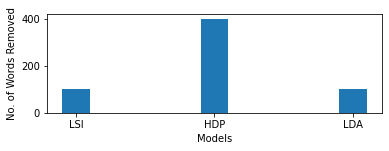

In [102]:
def evaluate_bar_graph(coherences, indices):
    plt.subplot(2,1,1)
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('No. of Words Removed')

    


evaluate_bar_graph([number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda],
                   ['LSI', 'HDP', 'LDA'])


# Word cloud-for Best Model

In [0]:
from wordcloud import WordCloud,STOPWORDS
import os
from PIL import Image

In [0]:

Best_model=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]
model=[lsi_words, hdp_words, lda_words]

k=2

if min(Best_model)==number_words_removed_lsi:
  k=0
if min(Best_model)==number_words_removed_hdp:
  k=1

#Best Model selected through least number of words removed


words_joined=[]# lda_words_joined[i] string of Topic-i words
j=''
for i in model[k]:
  j=''
  j=" ".join(i)+" "
  words_joined.append(j)




Topic : 1


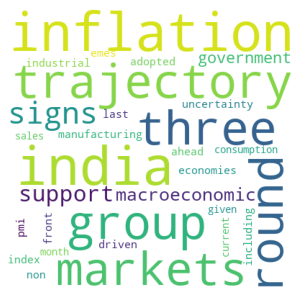


Topic : 2


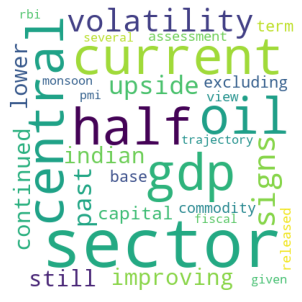


Topic : 3


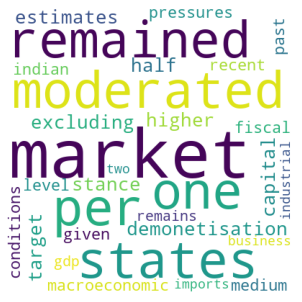


Topic : 4


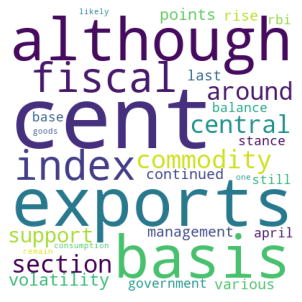


Topic : 5


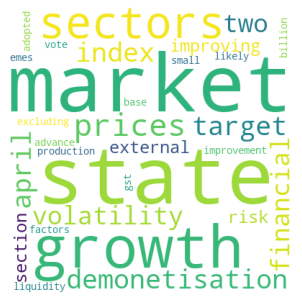


Topic : 6


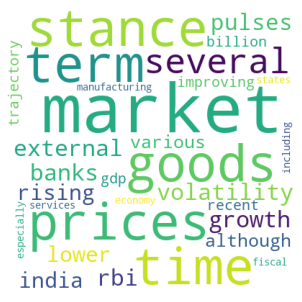


Topic : 7


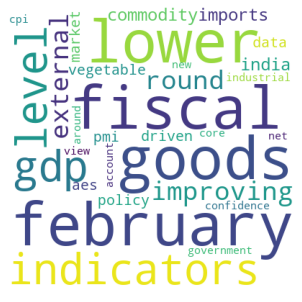


Topic : 8


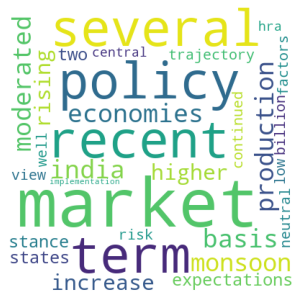


Topic : 9


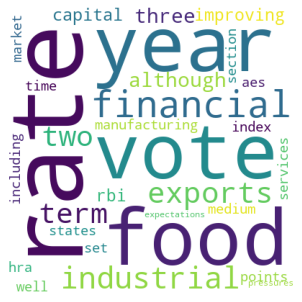


Topic : 10


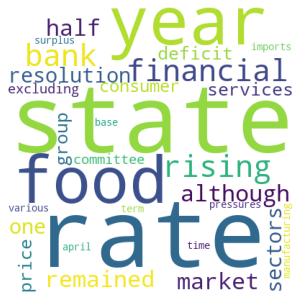

In [105]:
for i in range(len(words_joined)):
  print("\nTopic :",i+1)
  wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = STOPWORDS,
                min_font_size = 10,
                max_words=30                
                ).generate(words_joined[i]) 
  
# plot the WordCloud image                        
  #plt.subplot(i+4,i+4,)
  plt.figure(figsize = (4, 4), facecolor = None,edgecolor='black') 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 